In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import os
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# create a database connection
sqluser = 'maxim'
dbname = 'maxim'
schema_name = 'mimiciii'
queries_dir = './queries/'

In [3]:
# Connect to local postgres version of mimic
connect = psycopg2.connect(dbname=dbname, user=sqluser)
cursor = connect.cursor()
#cur.execute('SET search_path to {}'.format(schema_name))

In [4]:
# Load in the query from file
query='DROP TABLE IF EXISTS mimiciii.glucoselevels;'
cursor.execute(query)
f = os.path.join(queries_dir,'glucose-levels.sql')
with open(f) as fp:
    query = ''.join(fp.readlines())
    
# Execute the query
print('Generating table \'glucoselevels\' using {} ...'.format(f),end=' ')
cursor.execute(query)
print('done.')

Generating table 'glucoselevels' using ./queries/glucose-levels.sql ... done.


In [70]:
query = """
select *
from mimiciii.glucoselevels;
"""
cursor.execute(query)
# Load the result of the query into a dataframe
gl = pd.read_sql_query(query, connect)
gl = gl.replace(to_replace=r'[^0-9]+', value=np.nan, regex=True)


In [71]:
gl.dtypes

subject_id                       int64
hadm_id                          int64
icustay_id                     float64
itemid                           int64
value                           object
charttime               datetime64[ns]
hospital_expire_flag             int64
dtype: object

In [79]:
gl.loc[(gl.value.astype('float') > 1000) & (gl.itemid == 811)].head()

,subject_id,hadm_id,icustay_id,itemid,value,charttime,hospital_expire_flag
89109,391,100095,220320.0,811,1075,2108-09-28 21:09:00,1
147665,494,125330,224081.0,811,1268,2168-02-21 06:45:00,0
275433,1084,152984,212600.0,811,1143,2193-06-25 23:34:00,0
285587,1266,189402,251265.0,811,1191,2106-12-24 05:17:00,0
378963,2066,186403,205798.0,811,1018,2155-09-27 05:38:00,0


In [85]:
gl.loc[(gl.hospital_expire_flag == 1) & (gl.value.astype('float') > 1000)].subject_id.value_counts().head(10)

28666    4
10102    2
12532    2
8880     2
10731    2
391      2
15812    2
95201    1
10160    1
48826    1
Name: subject_id, dtype: int64

In [24]:
gl.loc[gl.subject_id == 357].itemid.value_counts()

807       725
1529      155
811       155
225664     74
220621     29
Name: itemid, dtype: int64

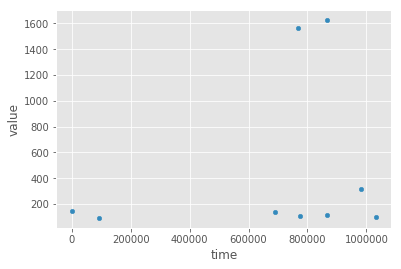

In [86]:
per_sub = gl.loc[(gl.subject_id == 28666) & (gl.itemid == 811)].sort_values(by='charttime')
per_sub['time'] = (per_sub.charttime - per_sub.iloc[0]['charttime']).dt.total_seconds()
per_sub['value'] = per_sub['value'].astype('float')
per_sub.plot.scatter(x='time',y='value')

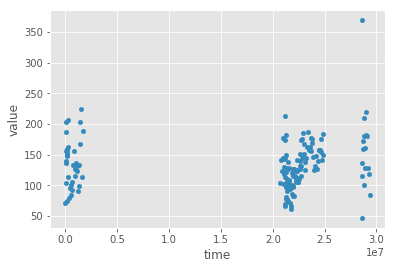

In [87]:
per_sub = gl.loc[(gl.subject_id == 357) & (gl.itemid == 811)].sort_values(by='charttime')
per_sub['time'] = (per_sub.charttime - per_sub.iloc[0]['charttime']).dt.total_seconds()
per_sub['value'] = per_sub['value'].astype('float')
per_sub.plot.scatter(x='time',y='value')